In [1]:
# Some imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

In [2]:
df = pd.read_csv('/content/UberData.csv')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.shape

(6745, 6)

In [5]:
df.shape

(6745, 6)

In [6]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [8]:
df.corr()

,Request id,Driver id
Request id,1.000000,-0.011499
Driver id,-0.011499,1.000000


Data Formatting

In [9]:
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: str(x).replace('/','-'))

In [13]:
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: str(x).replace('/','-'))

In [10]:
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: str(x)+':00' if str(x).count(':') == 1 else str(x))


In [20]:
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: str(x)+':00' if str(x).count(':') == 1 else str(x))

In [22]:
from datetime import datetime
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y %H:%M:%S"))
#df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y %H:%M:%S"))

ValueError: ignored

In [23]:
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y %H:%M:%S"))

ValueError: ignored

In [24]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11-7-2016 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11-7-2016 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12-7-2016 9:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12-7-2016 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     6745 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [27]:
df['Request Hour'] = df['Request timestamp'].dt.hour

In [28]:
df['Supply'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)

df['Gap'] = df['Status'].apply(lambda x: 'No' if x == 'Trip Completed' else 'Yes')

In [29]:
# Create new column Time Slot which helps during the analysis

TIME_SLOTS = {
    0: 'Late Night',
    1: 'Midnight',
    2: 'Midnight',
    3: 'Early Morning',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Night',
    20: 'Night',
    21: 'Night',
    22: 'Late Night',
    23: 'Late Night',
}

df['Time Slot'] = df['Request Hour'].apply(lambda x: TIME_SLOTS.get(x))

In [30]:
# Supply and Demand numbers for analysis

gap_count = pd.DataFrame(index=[0], columns=['Request Hour','Supply','Demand','Gap Count']).dropna()

gap_count['Request Hour'] = df.pivot_table(values = 'Supply', index = 'Request Hour', aggfunc = sum).index

gap_count['Supply'] = df.pivot_table(values = 'Supply', index = 'Request Hour', aggfunc = sum)['Supply']

gap_count['Demand'] = df.pivot_table(values = 'Status', index = 'Request Hour', aggfunc = len)['Status']

gap_count['Gap Count'] = gap_count['Demand'] - gap_count['Supply']

In [31]:
# Dropping columns that are not required for the current analysis

df = df.drop(columns=['Drop timestamp','Request timestamp','Supply','Driver id','Request id'])

In [32]:
df.head()

,Pickup point,Status,Request Hour,Gap,Time Slot
0,Airport,Trip Completed,11,No,Morning
1,Airport,Trip Completed,17,No,Evening
2,City,Trip Completed,9,No,Morning
3,Airport,Trip Completed,21,No,Night
4,City,Trip Completed,8,No,Morning


In [34]:
# Validating if the numbers are correct against the original data set count

gap_count['Demand'].sum() 

6745

In [35]:
# Data frame that contains data pertaining to all unfulfilled requests => Cancellation or Unavailability

uber_gap = df.loc[(df['Status'] == 'No Cars Available') | (df['Status'] == 'Cancelled')]

# Data frame that contains data pertaining to fulfilled requests => Trip completed

uber_supply = df.loc[df['Status'] == 'Trip Completed']

# Data frames taht contain data pertaining to fulfilled requests that have drop/pickup location as Airport respectively

uber_supply_airport_inflow = uber_supply.loc[uber_supply['Pickup point'] == 'City']
uber_supply_airport_outflow = uber_supply.loc[uber_supply['Pickup point'] == 'Airport']

# Other data frames with segmented information for airport & city like Cancelled data, No cars available data and 
# Trip complete data etc

uber_cancelled = df.loc[df['Status'] == 'Cancelled']
uber_nocar = df.loc[df['Status'] == 'No Cars Available']

uber_cancelled_aiport = df.loc[(df['Status'] == 'Cancelled') & (df['Pickup point'] == 'Airport')]
uber_cancelled_city = df.loc[(df['Status'] == 'Cancelled') & (df['Pickup point'] == 'City')]

uber_nocar_aiport = df.loc[(df['Status'] == 'No Cars Available') & (df['Pickup point'] == 'Airport')]
uber_nocar_city = df.loc[(df['Status'] == 'No Cars Available') & (df['Pickup point'] == 'City')]

uber_tripcomplete_aiport = df.loc[(df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'Airport')]
uber_tripcomplete_city = df.loc[(df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'City')]

In [37]:
# Distinct status counts to be matched with the plot data below

df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

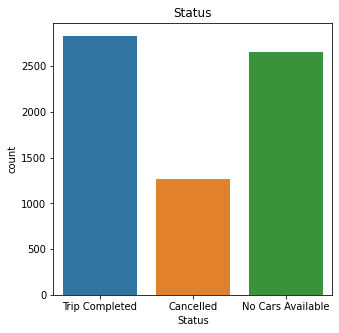

In [38]:
# Below plot shows the frequency of requests across different Status

plt.figure(figsize=(5,5))
plt.title('Status')
sns.countplot(x="Status", data=df)
plt.show()

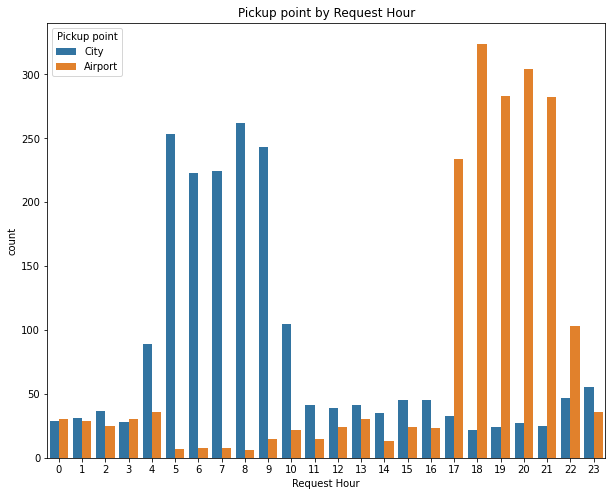

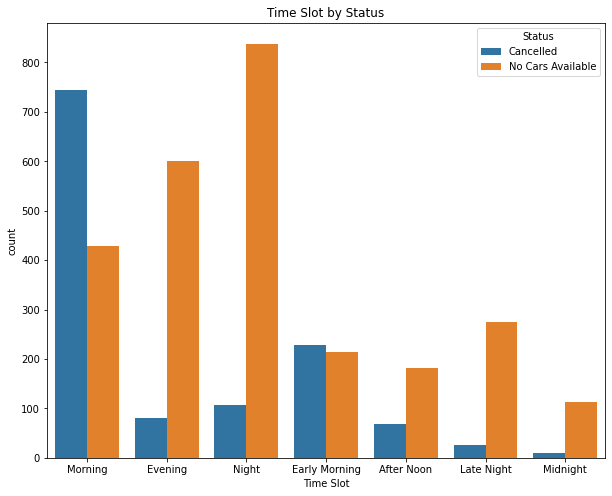

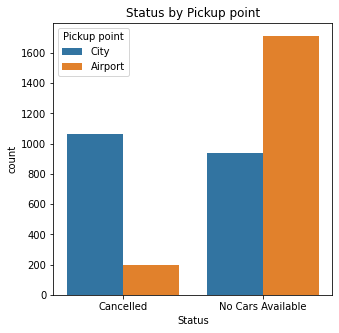

In [39]:
# Pickup point by Request Hour was chosen from Gap data frame to show which specific pickup point contributes to the
# high demand at which request hours

plt.figure(figsize=(10,8))
plt.title('Pickup point by Request Hour')
sns.countplot(x="Request Hour", hue="Pickup point", data=uber_gap)
plt.show()

# Time Slot by Status was chosen from Gap data frame to show which specific time slot contributes to the
# cancellations/no cars available problems

plt.figure(figsize=(10,8))
plt.title('Time Slot by Status')
sns.countplot(x="Time Slot", hue="Status", data=uber_gap)
plt.show()

# Pickup point by Status was chosen from Gap data frame to show which pickup point contributes to the supply-demand gap

plt.figure(figsize=(5,5))
plt.title('Status by Pickup point')
sns.countplot(x="Status", hue="Pickup point", data=uber_gap)
plt.show()

In [40]:
# Examining the supply and demand numbers to verify against the next plot for each request hour

gap_count

,Request Hour,Supply,Demand,Gap Count
0,0,40,99,59
1,1,25,85,60
2,2,37,99,62
3,3,34,92,58
4,4,78,203,125
5,5,185,445,260
6,6,167,398,231
7,7,174,406,232
8,8,155,423,268
9,9,173,431,258


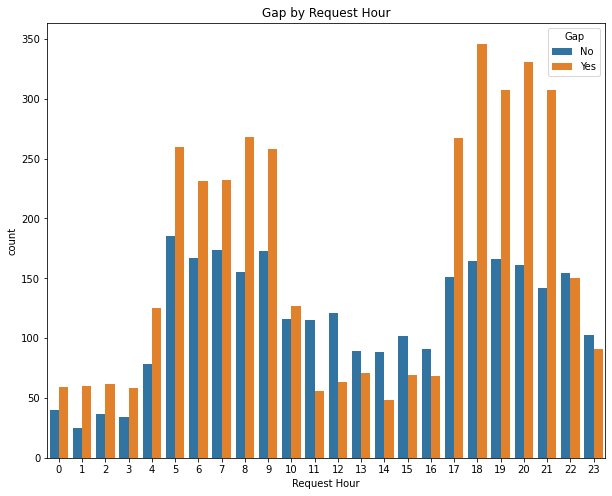

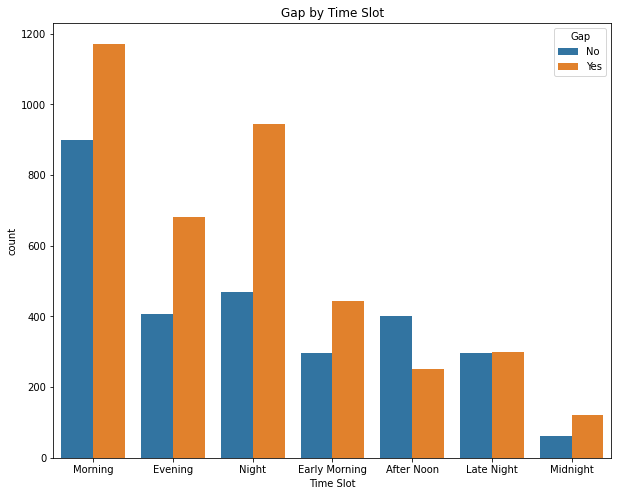

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


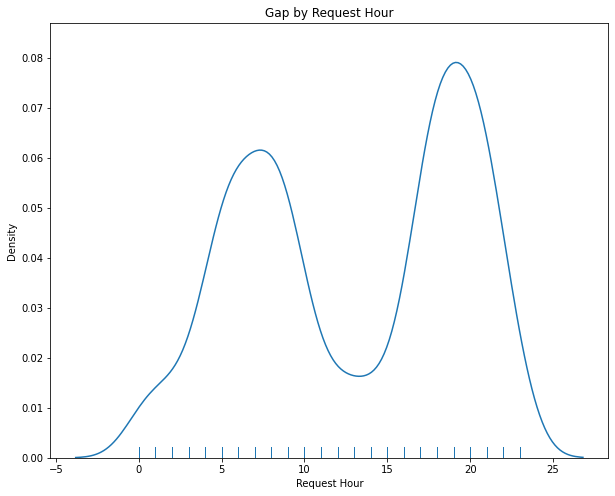

In [42]:
# Request hour by Gap from overall data was chosen to analyze which request hours are contributing to the supply-demand gap

plt.figure(figsize=(10,8))
plt.title('Gap by Request Hour')
sns.countplot(x="Request Hour", hue="Gap", data=df)
plt.show()

# Time Slot by Gap from overall data was chosen to analyze which time slots are contributing to the supply-demand gap

plt.figure(figsize=(10,8))
plt.title('Gap by Time Slot')
sns.countplot(x="Time Slot", hue="Gap", data=df)
plt.show()

# Same as above but with distribution plot

plt.figure(figsize=(10,8))
plt.title('Gap by Request Hour')
sns.distplot(uber_gap['Request Hour'], rug=True, hist=False)
plt.show()

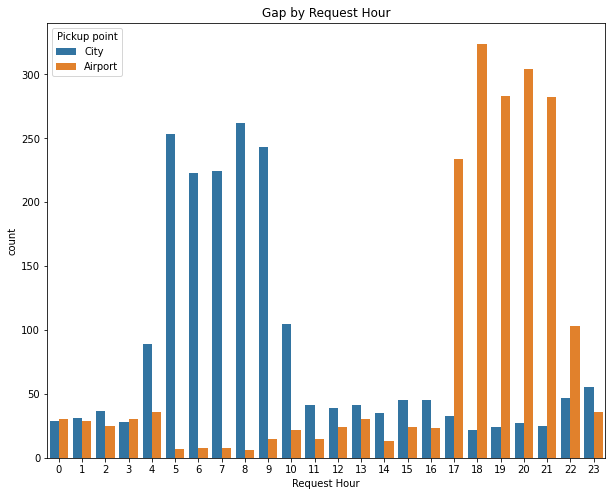

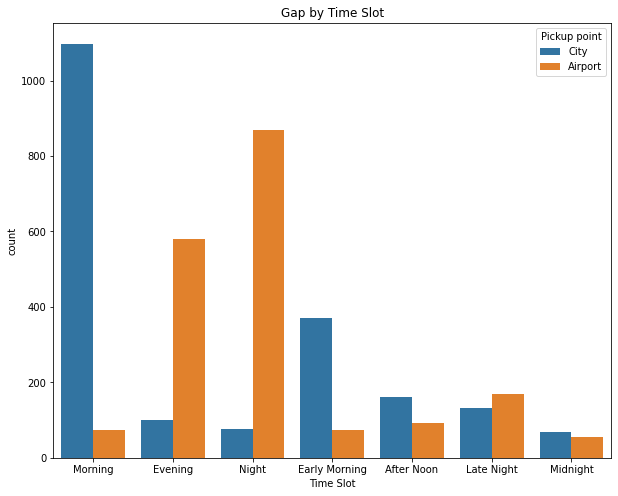

In [43]:
# Request hour by Pickup point from Gap data fame to analyze which pickup points contribute to the supply-demand gap

plt.figure(figsize=(10,8))
plt.title('Gap by Request Hour')
sns.countplot(x="Request Hour", hue="Pickup point", data=uber_gap)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Gap by Time Slot')
sns.countplot(x="Time Slot", hue="Pickup point", data=uber_gap)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


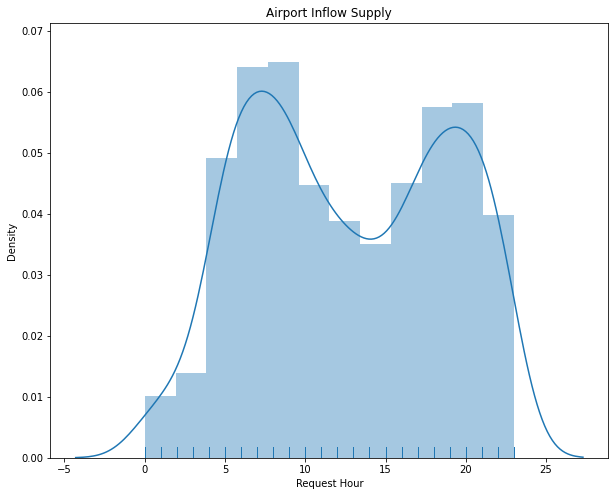

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


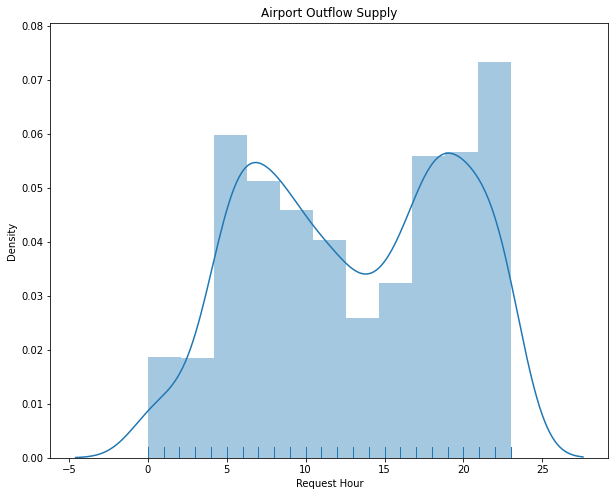

In [44]:
# Plot Airport inflow for finding the distribution of cars towards airport across the day

plt.figure(figsize=(10,8))
plt.title('Airport Inflow Supply')
sns.distplot(uber_supply_airport_inflow['Request Hour'], rug=True)
plt.show()

# Plot Airport outflow for finding the distribution of cars from airport across the day

plt.figure(figsize=(10,8))
plt.title('Airport Outflow Supply')
sns.distplot(uber_supply_airport_outflow['Request Hour'], rug=True)
plt.show()

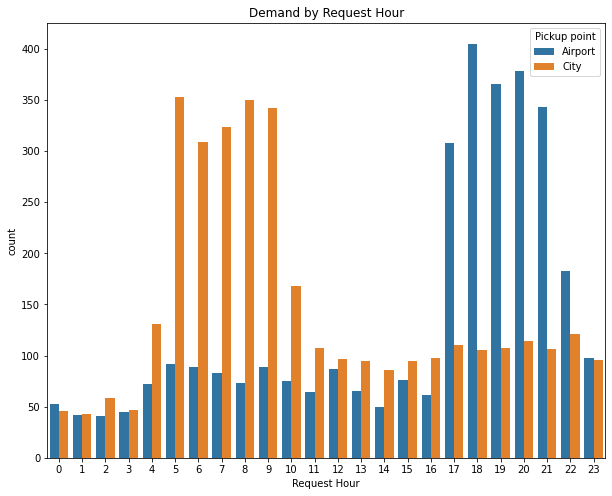

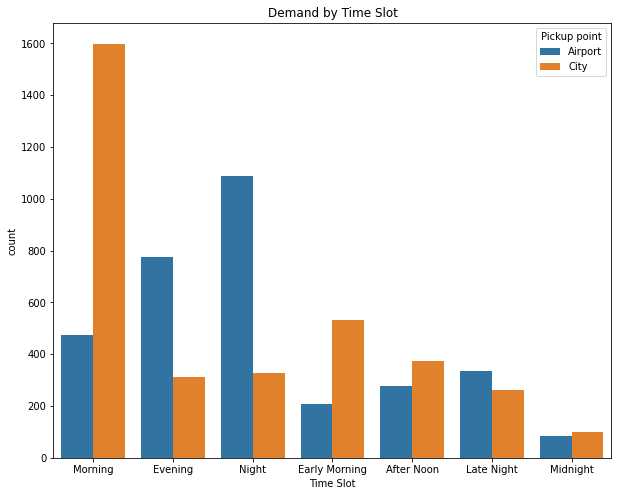

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


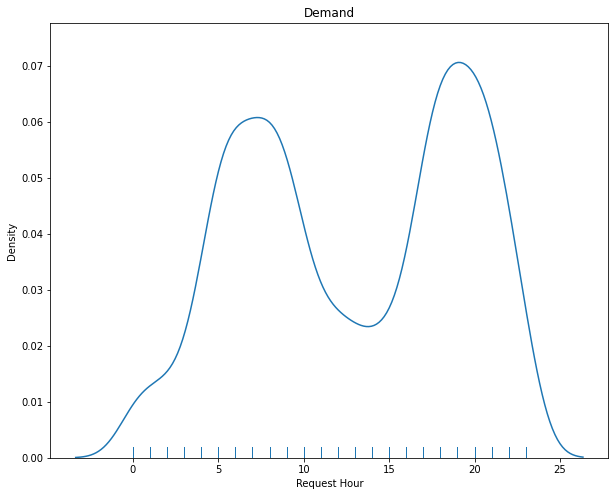

In [46]:
# Plots to show demand of cars across the day at various hours/time slots

plt.figure(figsize=(10,8))
plt.title('Demand by Request Hour')
sns.countplot(x="Request Hour", hue="Pickup point", data=df)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Demand by Time Slot')
sns.countplot(x="Time Slot", hue="Pickup point", data=df)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Demand')
sns.distplot(df['Request Hour'], rug=True, hist=False)
plt.show()

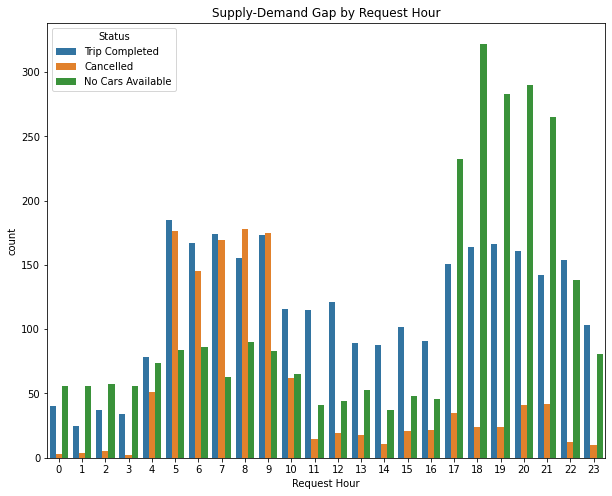

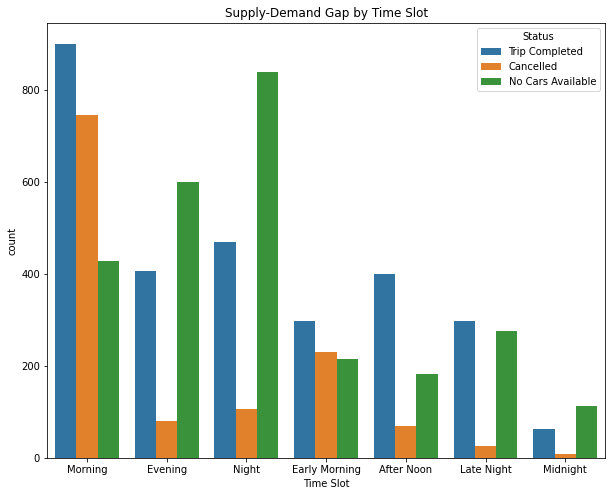

In [48]:
# Putting in all together from the data overall data set which shows supply (Trip Completed), demand (Cancellation
# /No Car) and gap

plt.figure(figsize=(10,8))
plt.title('Supply-Demand Gap by Request Hour')
sns.countplot(x="Request Hour", hue="Status", data=df)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Supply-Demand Gap by Time Slot')
sns.countplot(x="Time Slot", hue="Status", data=df)
plt.show()

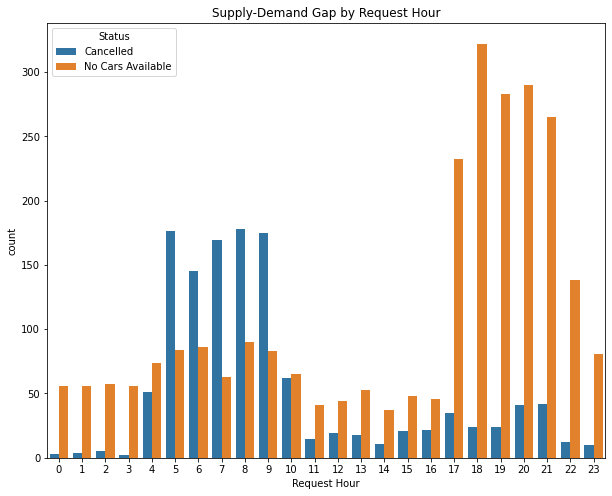

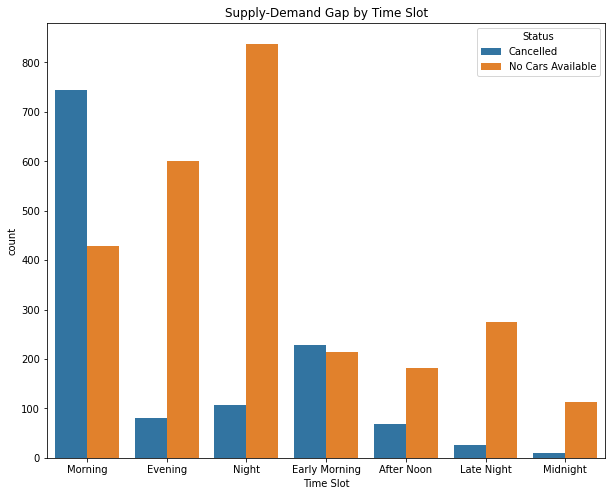

In [49]:
# Same as above but the data considered is the Gap data

plt.figure(figsize=(10,8))
plt.title('Supply-Demand Gap by Request Hour')
sns.countplot(x="Request Hour", hue="Status", data=uber_gap)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Supply-Demand Gap by Time Slot')
sns.countplot(x="Time Slot", hue="Status", data=uber_gap)
plt.show()

Additional Plots for EDA
Cancelled Requests

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

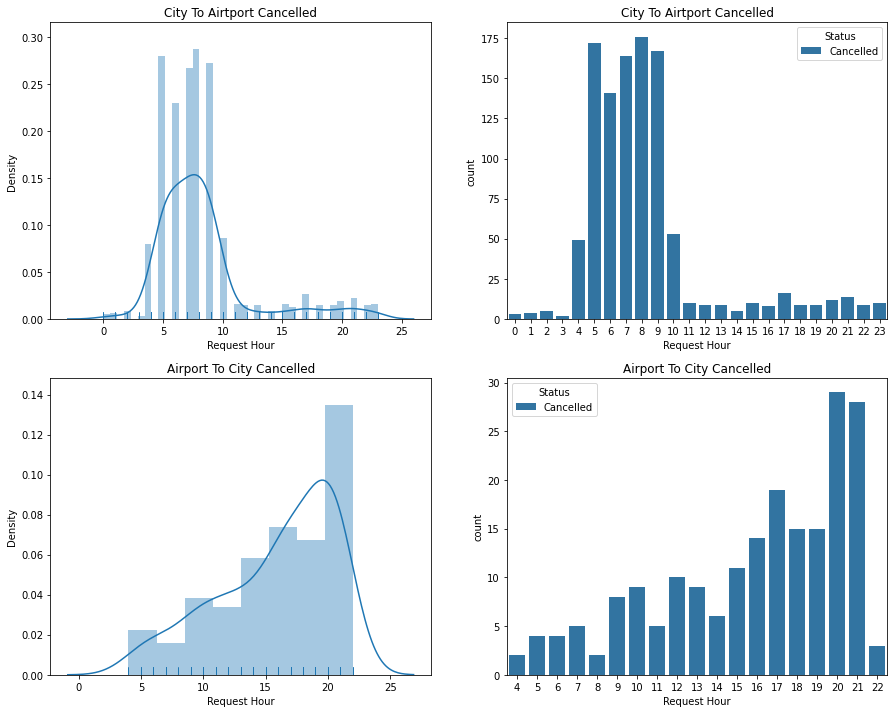

In [50]:
# figure size
plt.figure(figsize=(15,12))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('City To Airtport Cancelled')
sns.distplot(uber_cancelled_city['Request Hour'], rug=True)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('City To Airtport Cancelled')
sns.countplot(x="Request Hour", hue="Status", data=uber_cancelled_city)

# subplot 3
plt.subplot(2, 2, 3)
plt.title('Airport To City Cancelled')
sns.distplot(uber_cancelled_aiport['Request Hour'], rug=True)

# subplot 4
plt.subplot(2, 2, 4)
plt.title('Airport To City Cancelled')
sns.countplot(x="Request Hour", hue="Status", data=uber_cancelled_aiport)

plt.show()

No Cars Available Requests

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

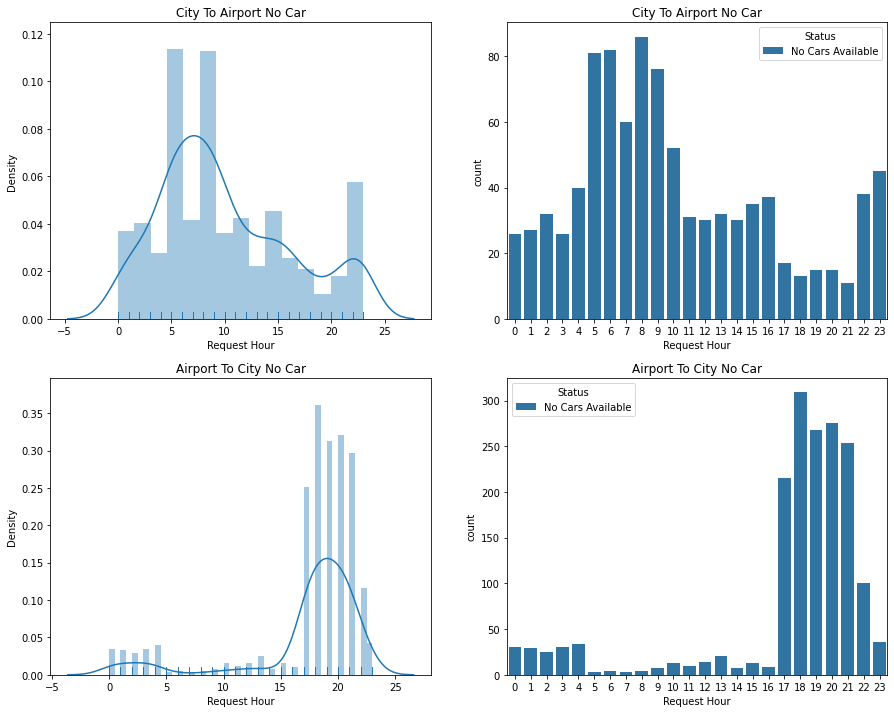

In [51]:
# figure size
plt.figure(figsize=(15,12))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('City To Airport No Car')
sns.distplot(uber_nocar_city['Request Hour'], rug=True)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('City To Airport No Car')
sns.countplot(x="Request Hour", hue="Status", data=uber_nocar_city)

# subplot 3
plt.subplot(2, 2, 3)
plt.title('Airport To City No Car')
sns.distplot(uber_nocar_aiport['Request Hour'], rug=True)

# subplot 4
plt.subplot(2, 2, 4)
plt.title('Airport To City No Car')
sns.countplot(x="Request Hour", hue="Status", data=uber_nocar_aiport)

plt.show()

Trip Completed Requests

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

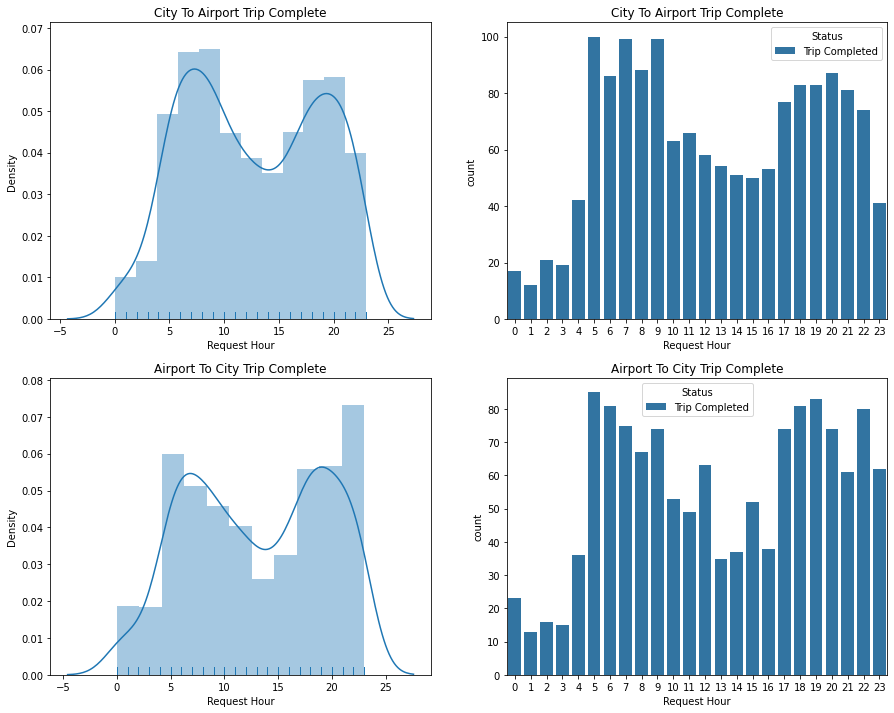

In [52]:
# figure size
plt.figure(figsize=(15,12))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('City To Airport Trip Complete')
sns.distplot(uber_tripcomplete_city['Request Hour'], rug=True)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('City To Airport Trip Complete')
sns.countplot(x="Request Hour", hue="Status", data=uber_tripcomplete_city)

# subplot 3
plt.subplot(2, 2, 3)
plt.title('Airport To City Trip Complete')
sns.distplot(uber_tripcomplete_aiport['Request Hour'], rug=True)

# subplot 4
plt.subplot(2, 2, 4)
plt.title('Airport To City Trip Complete')
sns.countplot(x="Request Hour", hue="Status", data=uber_tripcomplete_aiport)

plt.show()